## Linear Regression with Gradient Descent from scratch
 one variable linear regression

 Multiple variable linear regression
 
 Gradient Descent - squared mean cost function


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [16]:
def prediction(Xtrain,coeff):
    Ypred=[]
    cols=Xtrain.columns
    for i in range(Xtrain.shape[0]):
        y=coeff[0]
        x=Xtrain.loc[i]
        for j in range (1,len(coeff)):
            y+=coeff[j]*(x[cols[j-1]])
        Ypred.append(y)
    return Ypred

def Coefficients(Ytrain,Xtrain,coeff,alpha=0.000001):
    # using gradiant decent with squared mean cost function
    Ypred = prediction(Xtrain,coeff)
    pd=[0]*len(coeff)
    cols=Xtrain.columns
    for i in range (len (Ypred)):
        x=Xtrain.loc[i]
        pd[0]+=(Ypred[i]-Ytrain[i])
        for j in range (1,len(coeff)):
                pd[j]+=(Ypred[i]-Ytrain[i])*x[cols[j-1]]
                
    for i in range(len(coeff)):
        pd[i]=(pd[i]*2)/len(Ypred)
        coeff[i]=coeff[i]-(alpha*(pd[i]))
    return coeff

def LinRegression(Xtrain,Ytrain,Xtest,Ytest,inbuilt=0,coeff=[1]):
    if(inbuilt):
        linreg=LinearRegression()
        linreg.fit(Xtrain,Ytrain)
        predictions=linreg.predict(Xtest)
        coefficients=[linreg.intercept_]
        coefficients.extend(linreg.coef_)
        return coefficients,predictions,linreg.score(Xtest,Ytest)
    else:
        if(len(coeff)==1):
            coeff=[1]*(len(Xtrain.columns)+1)
        alpha=0.00000005
        rounds=50
        for i in range(rounds):
            coeff=Coefficients(Ytrain,Xtrain,coeff,alpha)
        Ypred=prediction(Xtest,coeff)
        return coeff,Ypred

In [4]:
df=pd.read_csv('gold-silver.csv')
df.reset_index(drop=True,inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,gold,silver
0,0,535,1980-01-18,469.20,1854.23
1,1,536,1980-01-21,478.56,1901.93
2,2,537,1980-01-22,450.93,1856.74
3,3,7780,2007-10-26,451.42,550.24
4,4,7781,2007-10-29,454.49,556.20


<AxesSubplot:xlabel='gold', ylabel='silver'>

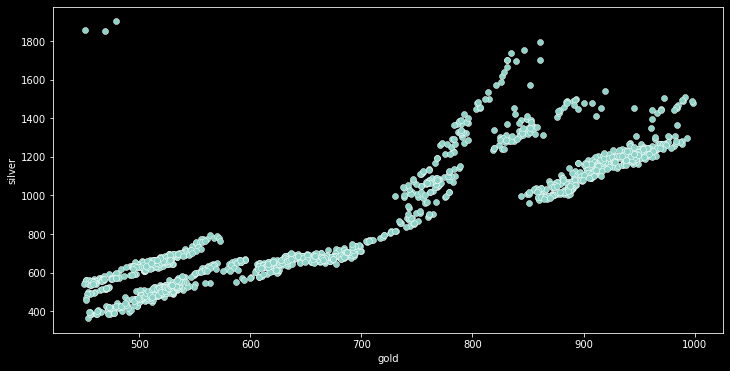

In [5]:
sns.scatterplot(data=df,x='gold',y='silver')

In [17]:
X=df[['gold']]
Y=df['silver']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=101);
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

### scratch

In [18]:
Ypred=LinRegression(x_train, y_train, x_test, y_test, inbuilt=0,coeff=[-310,2])
print("coefficients of Scratch LinearReg model: \n",Ypred[0],"\n")
print("predictions of Scratch LinearReg model: \n",Ypred[1][:20],"\n")
# print("accuracy of this model is : ")

coefficients of Scratch LinearReg model: 
 [-310.00040204773444, 1.698138419276815] 

predictions of Scratch LinearReg model: 
 [950.9522811862644, 1177.5518718545627, 769.3703400129946, 597.0262718405907, 469.59796485805845, 474.5565290423469, 1206.1485228351844, 1344.2411390907748, 1148.4287979639653, 1266.9758410136797, 1324.237068511694, 852.0866624159682, 532.700788518385, 1222.3997075076634, 577.4297544821363, 719.8526237068827, 1304.9462160687092, 1246.5642172139724, 465.7431906463002, 555.472824720887] 



### inbuilt

In [19]:
predict=LinRegression(x_train, y_train, x_test, y_test, inbuilt=1)
print("coefficients of Inbuilt LinearReg model: \n",predict[0],"\n")
print("predictions of Inbuilt LinearReg model: \n",predict[1][:20],"\n")
print("accuracy of this model is : ",predict[2])

coefficients of Inbuilt LinearReg model: 
 [-299.61019690007913, 1.6622347587478172] 

predictions of Inbuilt LinearReg model: 
 [ 934.68222321 1156.49082942  756.93946046  588.23925479  463.50515849
  468.35888399 1184.48286275 1319.65579333 1127.9835033  1244.02411181
 1300.07466788  837.90691555  525.27380213 1200.39044939  569.05706567
  708.46869489 1281.19168102 1224.04405001  459.73188559  547.56437024] 

accuracy of this model is :  0.7434206994180984


### line model

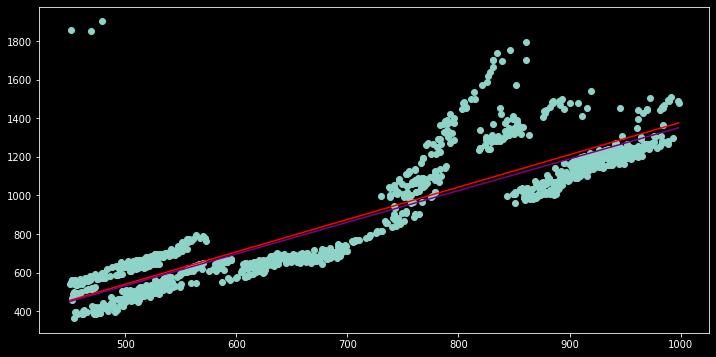

In [9]:
plt.scatter(X,Y)
plt.plot([min(X[X.columns[0]]), max(X[X.columns[0]])], [min(Ypred[1]), max(Ypred[1])], color='red') #scratch
plt.plot([min(X[X.columns[0]]), max(X[X.columns[0]])], [min(predict[1]), max(predict[1])], color='purple') #inbuilt

In [10]:
data=pd.read_csv('Computers.csv')
data=data.drop('index',axis=1)
# data.isna().sum()
# data.info()
data.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [11]:
print(data.describe().columns)
X=data[['speed', 'hd', 'ram', 'screen', 'ads', 'trend']]
Y=data['price']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.33,random_state=101)
Xtrain.reset_index(drop=True,inplace=True)
Xtest.reset_index(drop=True,inplace=True)
Ytrain.reset_index(drop=True,inplace=True)
Ytest.reset_index(drop=True,inplace=True)

Index(['price', 'speed', 'hd', 'ram', 'screen', 'ads', 'trend'], dtype='object')


In [21]:
Ypred=LinRegression(Xtrain, Ytrain, Xtest, Ytest,0,[-220, 9, 0.7, 48, 123, 0.9, -45])
print("coefficients of Scratch LinearReg model: \n",Ypred[0],"\n")
print("predictions of Scratch LinearReg model: \n",Ypred[1][:20],"\n\n")

predict=LinRegression(Xtrain, Ytrain, Xtest, Ytest,1)
print("coefficients of Inbuilt LinearReg model: \n",predict[0],"\n")
print("predictions of Inbuilt LinearReg model: \n",predict[1][:20],"\n")
print("accuracy of this model is : ")

coefficients of Scratch LinearReg model: 
 [-219.99999915993135, 8.999455258913098, 0.6873230599114823, 48.566767882298144, 123.00000164920559, 0.9039752943493454, -45.000649057860606] 

predictions of Scratch LinearReg model: 
 [2474.846090928147, 2013.4752043649619, 2121.55600836767, 2387.5480634251585, 2096.6754973553248, 1939.703272738784, 2222.1455125963157, 2550.5374888199212, 1635.7439539829566, 1832.9928419157022, 2099.14551094711, 2456.43322356675, 2040.0893880188414, 2803.960383451268, 2163.7340992140025, 3099.4304420097687, 2952.6337237842004, 2050.3198543825642, 2496.4669396625914, 1745.178012901738] 


coefficients of Inbuilt LinearReg model: 
 [-220.81138066679068, 9.079632315716312, 0.6931315187850993, 48.56689435991617, 123.89380638869018, 0.9728600552677455, -47.01742728087182] 

predictions of Inbuilt LinearReg model: 
 [2492.0238071  2004.67837281 2118.17042848 2395.67804078 2099.33425182
 1940.78672881 2239.32017624 2550.7717336  1611.29777378 1838.74872839
 2115.42